In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('COVID-19_aantallen_gemeente_per_dag.csv', delimiter = ";")

In [15]:
df.head()

,Date_of_report,Date_of_publication,Municipality_code,Municipality_name,Province,Security_region_code,Security_region_name,Municipal_health_service,ROAZ_region,Total_reported,Hospital_admission,Deceased
0,2021-02-24 10:00:00,2020-02-27,GM0014,Groningen,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
1,2021-02-24 10:00:00,2020-02-27,GM0034,Almere,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0
2,2021-02-24 10:00:00,2020-02-27,GM0037,Stadskanaal,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
3,2021-02-24 10:00:00,2020-02-27,GM0047,Veendam,Groningen,VR01,Groningen,GGD Groningen,Acute Zorgnetwerk Noord Nederland,0,0,0
4,2021-02-24 10:00:00,2020-02-27,GM0050,Zeewolde,Flevoland,VR25,Flevoland,GGD Flevoland,SpoedZorgNet,0,0,0


In [26]:
df_date = df[['Date_of_publication', 'Total_reported', 'Hospital_admission', 'Deceased']].groupby('Date_of_publication').sum().reset_index()

In [30]:
df_date.head()

,Date_of_publication,Total_reported,Hospital_admission,Deceased
0,2020-02-27,0,1,0
1,2020-02-28,1,0,0
2,2020-02-29,1,1,0
3,2020-03-01,3,0,0
4,2020-03-02,5,0,0


In [35]:
df_date['first_total_reported'] = df_date['Total_reported'].astype(str).str[0].astype(int)
df_date['first_hospital_admission'] = df_date['Hospital_admission'].astype(str).str[0].astype(int)
df_date['first_deceased'] = df_date['Deceased'].astype(str).str[0].astype(int)

In [36]:
df_date.head()

,Date_of_publication,Total_reported,Hospital_admission,Deceased,first_total_reported,first_hospital_admission,first_deceased
0,2020-02-27,0,1,0,0,1,0
1,2020-02-28,1,0,0,1,0,0
2,2020-02-29,1,1,0,1,1,0
3,2020-03-01,3,0,0,3,0,0
4,2020-03-02,5,0,0,5,0,0


In [41]:
df_date.describe()

,Total_reported,Hospital_admission,Deceased,first_total_reported,first_hospital_admission,first_deceased
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,2936.703297,65.865385,42.324176,4.098901,4.464286,3.502747
std,3311.543057,89.802728,45.628266,2.582223,2.748671,2.703430
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,213.000000,7.000000,3.000000,1.000000,2.000000,1.000000
50%,1014.000000,54.000000,27.000000,4.000000,5.000000,3.000000
75%,5317.500000,84.000000,74.000000,6.000000,7.000000,6.000000
max,12998.000000,695.000000,231.000000,9.000000,9.000000,9.000000


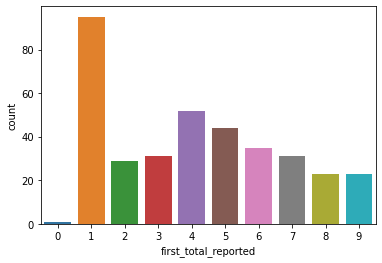

In [38]:
sns.countplot(x = 'first_total_reported', data = df_date);

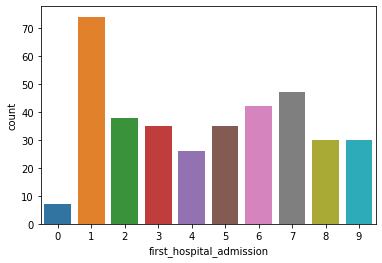

In [39]:
sns.countplot(x = 'first_hospital_admission', data = df_date);

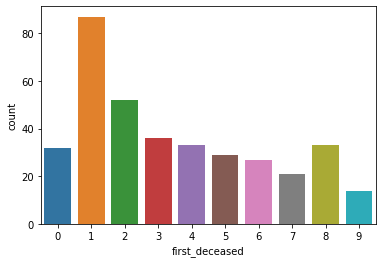

In [40]:
sns.countplot(x = 'first_deceased', data = df_date);